# Projection example

(-0.5, 399.5, 299.5, -0.5)

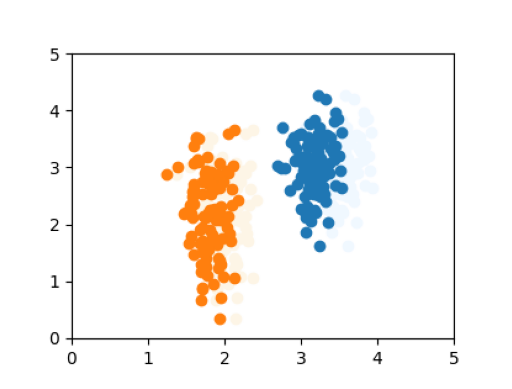

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from manim import *

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x1 = np.random.normal(2, 0.2,100)
y1 = np.random.normal(2.2, 0.8,100)

x2 = np.random.normal(3.5, 0.2,100)
y2 = np.random.normal(3, 0.5,100)


def make_plot(x_tracker,y_tracker):
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlim(0,5)
    ax.set_ylim(0,5)
    ax.scatter(x1,y1 , color="oldlace" )
    ax.scatter(x2,y2 , color="aliceblue")
    ax.scatter(x1 * x_tracker, y1 * y_tracker, color="tab:orange")
    ax.scatter(x2 * x_tracker, y2 * y_tracker , color="tab:blue")
    fig.canvas.draw()
    image = np.array(fig.canvas.buffer_rgba())
    plt.close()
    return image

plt.imshow(make_plot(0.9,1))
plt.axis("off")

In [107]:
class Example(Scene):
    def construct(self):
        self.camera.background_color= WHITE
        amp1=1
        amp2=0.1
        tr_amplitude1 = ValueTracker(amp1)
        tr_amplitude2 = ValueTracker(amp1)

        image = ImageMobject(make_plot(1,1)).scale(3)
        self.add(image)

        def update_image(mob):
            new_mob = ImageMobject(make_plot(tr_amplitude1.get_value(),tr_amplitude2.get_value())).scale(3)
            mob.become(new_mob)

        image.add_updater(update_image)
        self.play(tr_amplitude1.animate.set_value(amp2), run_time=1)
        self.play(tr_amplitude1.animate.set_value(amp1), run_time=1)
        self.play(tr_amplitude2.animate.set_value(amp2), run_time=1)
        self.play(tr_amplitude2.animate.set_value(amp1), run_time=1)


%manim -v WARNING -qm --disable_caching --progress_bar None Example